## Important Libraries

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly 
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
import imblearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE
import tensorflow
import plotly.express as px
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, f1_score, roc_curve, auc, roc_auc_score

import tensorflow
from keras.layers import Dense, BatchNormalization, Dropout
from keras.models import Sequential
from keras.callbacks import EarlyStopping

# importing different optimizers
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam, RMSprop

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
import imblearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, f1_score, roc_curve, auc, roc_auc_score

In [2]:
import sklearn

print(f"Pandas version {pd.__version__}")
print(f"Numpy version {np.__version__}")
print(f"Scikit-Learn version {sklearn.__version__}")

Pandas version 1.5.3
Numpy version 1.24.3
Scikit-Learn version 1.3.2


### Loading the dataset

In [4]:
df = pd.read_csv('Credit risk assesment.csv')

In [6]:
df.head().T

0               1            2           3  \
customer_id              CST_115179      CST_121920   CST_109330  CST_128288   
name                       ita Bose  Alper Jonathan  Umesh Desai         Rie   
age                              46              29           37          39   
gender                            F               M            M           F   
owns_car                          N               N            N           N   
owns_house                        Y               Y            Y           Y   
no_of_children                  0.0             0.0          0.0         0.0   
net_yearly_income         107934.04       109862.62    230153.17   122325.82   
no_of_days_employed           612.0          2771.0        204.0     11941.0   
occupation_type             Unknown        Laborers     Laborers  Core staff   
total_family_members            1.0             2.0          2.0         2.0   
migrant_worker                  1.0             0.0          0.0         0.0   
yearly_debt_payments       33070.28        15329.53      48416.6    22574.36   
credit_limit               18690.93        37745.19     41598.36    32627.76   
credit_limit_used(%)             73              52           43          20   
credit_score                  544.0           857.0        650.0       754.0   
prev_defaults                     2               0            0           0   
default_in_last_6months           1               0            0           0   
credit_card_default               1               0            0           0   

                                  4  
customer_id              CST_151355  
name                         McCool  
age                              46  
gender                            M  
owns_car                          Y  
owns_house                        Y  
no_of_children                  0.0  
net_yearly_income          387286.0  
no_of_days_employed          1459.0  
occupation_type          Core staff  
total_family_members            1.0  
migrant_worker                  0.0  
yearly_debt_payments       38282.95  
credit_limit               52950.64  
credit_limit_used(%)             75  
credit_score                  927.0  
prev_defaults                     0  
default_in_last_6months           0  
credit_card_default               0

# EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45528 entries, 0 to 45527
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              45528 non-null  object 
 1   name                     45528 non-null  object 
 2   age                      45528 non-null  int64  
 3   gender                   45528 non-null  object 
 4   owns_car                 44981 non-null  object 
 5   owns_house               45528 non-null  object 
 6   no_of_children           44754 non-null  float64
 7   net_yearly_income        45528 non-null  float64
 8   no_of_days_employed      45065 non-null  float64
 9   occupation_type          45528 non-null  object 
 10  total_family_members     45445 non-null  float64
 11  migrant_worker           45441 non-null  float64
 12  yearly_debt_payments     45433 non-null  float64
 13  credit_limit             45528 non-null  float64
 14  credit_limit_used(%)  

In [6]:
df.describe().T

count           mean            std       min  \
age                      45528.0      38.993411       9.543990     23.00   
no_of_children           44754.0       0.420655       0.724097      0.00   
net_yearly_income        45528.0  200655.622249  669074.034607  27170.61   
no_of_days_employed      45065.0   67609.289293  139323.524434      2.00   
total_family_members     45445.0       2.158081       0.911572      1.00   
migrant_worker           45441.0       0.179111       0.383450      0.00   
yearly_debt_payments     45433.0   31796.965311   17269.727234   2237.47   
credit_limit             45528.0   43548.416028  148784.686878   4003.14   
credit_limit_used(%)     45528.0      52.235020      29.376910      0.00   
credit_score             45520.0     782.791257     100.619746    500.00   
prev_defaults            45528.0       0.060710       0.264629      0.00   
default_in_last_6months  45528.0       0.050540       0.219059      0.00   
credit_card_default      45528.0       0.081203       0.273149      0.00   

                                25%         50%          75%           max  
age                          31.000      39.000      47.0000  5.500000e+01  
no_of_children                0.000       0.000       1.0000  9.000000e+00  
net_yearly_income        126345.835  171714.910  240603.7600  1.407590e+08  
no_of_days_employed         936.000    2224.000    5817.0000  3.652520e+05  
total_family_members          2.000       2.000       3.0000  1.000000e+01  
migrant_worker                0.000       0.000       0.0000  1.000000e+00  
yearly_debt_payments      19231.140   29081.650   40561.1500  3.281129e+05  
credit_limit              23973.805   35688.045   53435.7625  3.112997e+07  
credit_limit_used(%)         27.000      54.000      78.0000  9.900000e+01  
credit_score                704.000     786.000     867.0000  9.490000e+02  
prev_defaults                 0.000       0.000       0.0000  2.000000e+00  
default_in_last_6months       0.000       0.000       0.0000  1.000000e+00  
credit_card_default           0.000       0.000       0.0000  1.000000e+00

In [7]:
df.head(2)

customer_id            name  age gender owns_car owns_house  no_of_children  \
0  CST_115179        ita Bose   46      F        N          Y             0.0   
1  CST_121920  Alper Jonathan   29      M        N          Y             0.0   

   net_yearly_income  no_of_days_employed occupation_type  \
0          107934.04                612.0         Unknown   
1          109862.62               2771.0        Laborers   

   total_family_members  migrant_worker  yearly_debt_payments  credit_limit  \
0                   1.0             1.0              33070.28      18690.93   
1                   2.0             0.0              15329.53      37745.19   

   credit_limit_used(%)  credit_score  prev_defaults  default_in_last_6months  \
0                    73         544.0              2                        1   
1                    52         857.0              0                        0   

   credit_card_default  
0                    1  
1                    0

In [5]:
# removing uneccessary columns
df = df.drop(['customer_id', 'name'], axis = 1)

In [6]:
df.head(1)

age gender owns_car owns_house  no_of_children  net_yearly_income  \
0   46      F        N          Y             0.0          107934.04   

   no_of_days_employed occupation_type  total_family_members  migrant_worker  \
0                612.0         Unknown                   1.0             1.0   

   yearly_debt_payments  credit_limit  credit_limit_used(%)  credit_score  \
0              33070.28      18690.93                    73         544.0   

   prev_defaults  default_in_last_6months  credit_card_default  
0              2                        1                    1

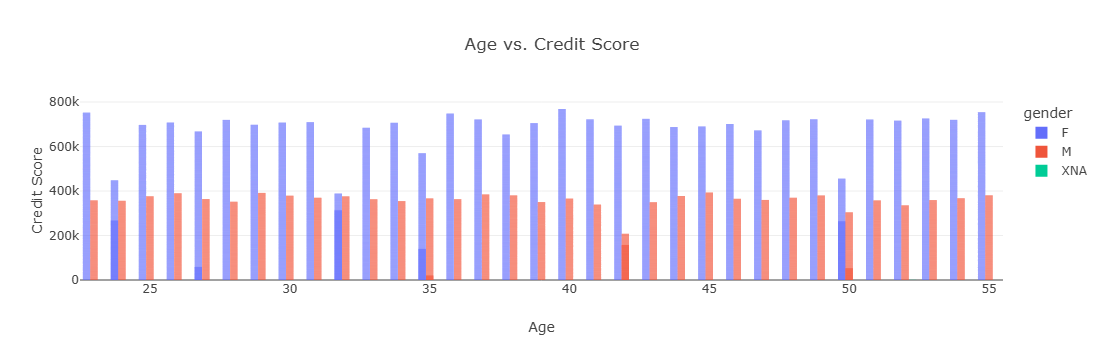

In [24]:
fig1 = px.bar(
    df,
    x="age",
    y="credit_score",
    title="Age vs. Credit Score",
    labels={"age": "Age", "credit_score": "Credit Score"},
    color="gender",  # Adding color based on gender
    color_discrete_sequence=["#636EFA", "#EF553B", "#00CC96"]  # Vibrant colors
)

# Set barmode and opacity to ensure solid bars
fig1.update_layout(template = None, barmode="group")  # Groups bars side by side
fig1.update_traces(opacity=1)  # Removes transparency
fig1.show()


**This bar chart displays the relationship between "Age" (x-axis) and "Credit Score" (y-axis), grouped by gender. The genders are represented by colors: blue for females (F), red for males (M), and green for unknown gender (XNA).**

Key observations:

* Across all age groups, females generally have higher credit scores compared to males.
* The trend of credit scores remains consistent across the age range, with females showing consistently higher scores.
* Data for the "XNA" category is minimal, appearing in only one or two age groups.

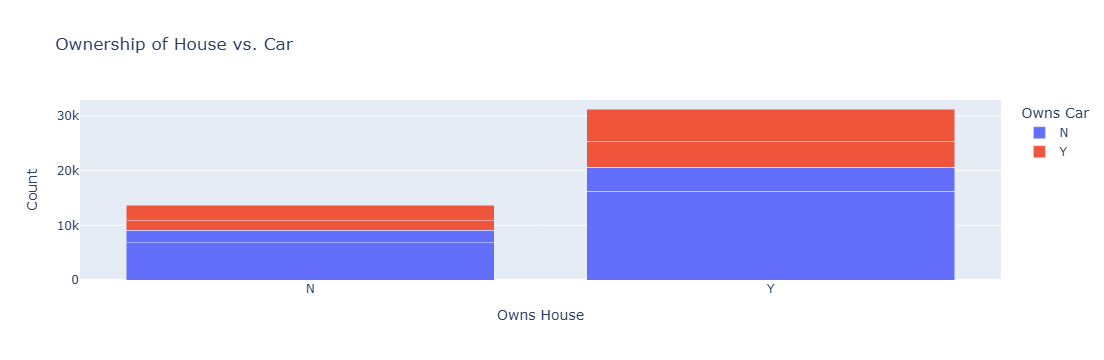

In [28]:
# Ownership of House vs. Car
ownership_data = df.groupby(["owns_house", "owns_car", "gender"]).size().reset_index(name="count")
fig3 = px.bar(
    ownership_data,
    x="owns_house",
    y="count",
    color="owns_car",
    barmode="stack",
    title="Ownership of House vs. Car",
    labels={"owns_house": "Owns House", "count": "Count", "owns_car": "Owns Car"},
)
fig3.show()


**This bar chart visualizes the relationship between house ownership and car ownership. The x-axis represents house ownership ("Y" for yes, "N" for no), while the y-axis represents the count of individuals. The data is grouped by car ownership: blue for those who do not own a car ("N") and red for those who do own a car ("Y").**

Key observations:

* A significant number of individuals own both a house and a car.
* There is also a noticeable group of individuals who own a house but do not own a car.
* Among those who do not own a house, the distribution between car ownership and non-ownership is much smaller in count.

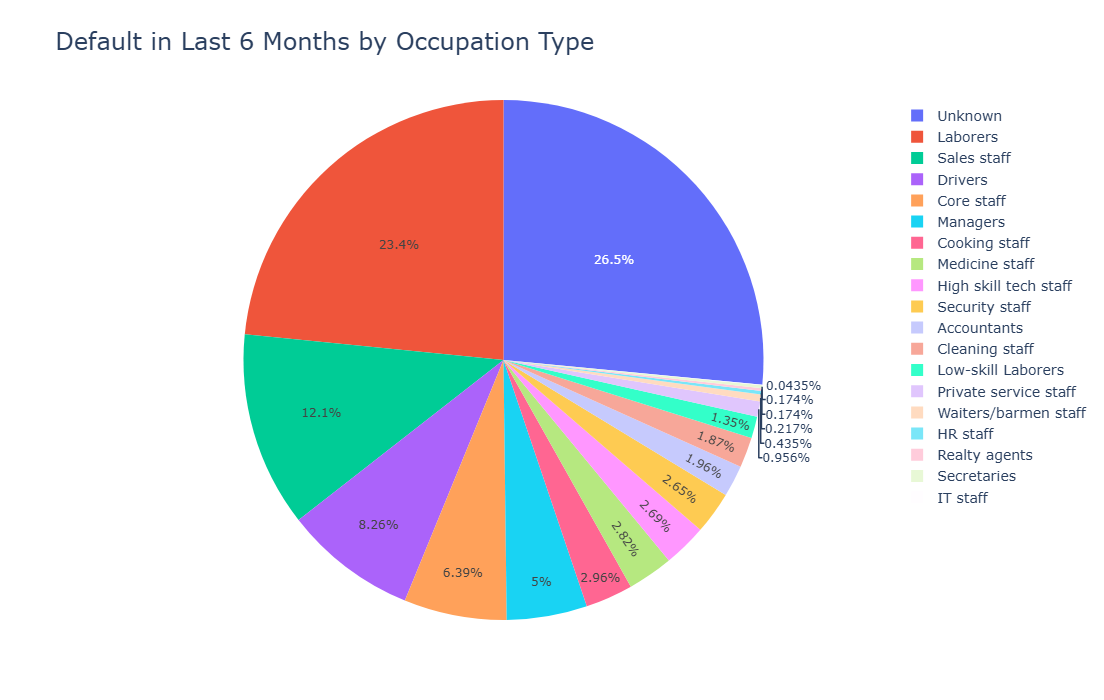

In [31]:
# Default in Last 6 Months by Occupation Type
occupation_data = df.groupby("occupation_type")["default_in_last_6months"].sum().reset_index()
fig5 = px.pie(
    occupation_data,
    values="default_in_last_6months",
    names="occupation_type",
    title="Default in Last 6 Months by Occupation Type",
    labels={"occupation_type": "Occupation Type"},
)

fig5.update_layout(
    height=700,  # Adjust height
    width=900,   # Adjust width
    title_font_size=24,  # Larger title font
    legend_font_size=14  # Larger legend font
)
fig5.show()

**This pie chart represents the distribution of defaults in the last six months by occupation type. The largest segment, at 26.5%, corresponds to individuals with "Unknown" occupation types, followed by "Laborers" at 23.4% and "Sales staff" at 12.1%. Other occupations like "Drivers," "Core staff," and "Managers" show smaller contributions, with many specialized roles (e.g., "IT staff," "Secretaries," and "Realty agents") making up minor portions. This chart highlights how defaults vary across different occupations, with certain groups being more represented in the defaulting population.**

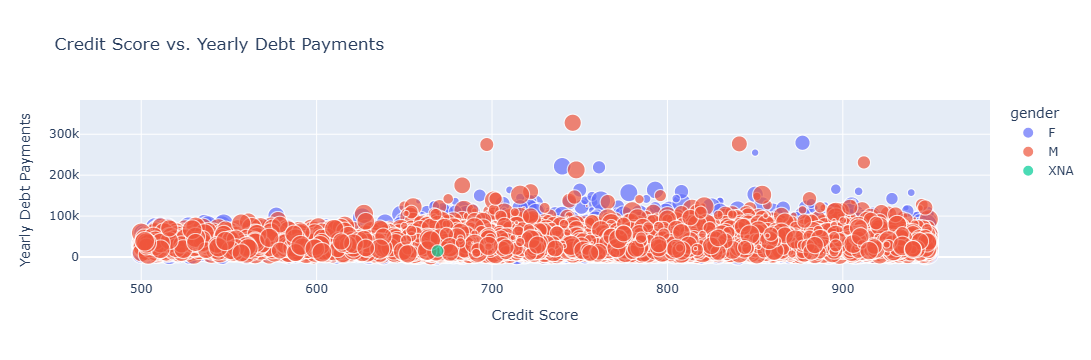

In [30]:
# Credit Score vs. Yearly Debt Payments
fig4 = px.scatter(
    df,
    x="credit_score",
    y="yearly_debt_payments",
    size="credit_limit_used(%)",
    color="gender",
    title="Credit Score vs. Yearly Debt Payments",
    labels={
        "credit_score": "Credit Score",
        "yearly_debt_payments": "Yearly Debt Payments",
        "credit_limit_used(%)": "Credit Limit Used (%)",
    },
)
fig4.show()

**This scatter plot visualizes the relationship between "Credit Score" (x-axis) and "Yearly Debt Payments" (y-axis), categorized by gender. The data points are color-coded: blue for females (F), red for males (M), and green for an unknown gender (XNA). Each point represents an individual, with its position reflecting their credit score and annual debt payments. Most data points cluster in the lower credit score range and low yearly debt payments, but some outliers exist with high debt payments or credit scores.**

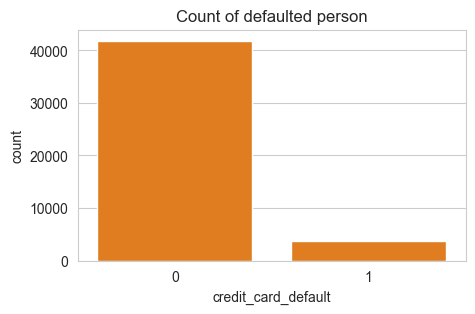

In [16]:
sns.set_style('whitegrid')
colors = sns.color_palette("bright")
plt.figure(figsize=(5, 3))
sns.countplot(x='credit_card_default', data=df, color = colors[1])
plt.title('Count of defaulted person')

plt.show()

# Data Pre-processing

In [36]:
df.dtypes

age                          int64
gender                      object
owns_car                    object
owns_house                  object
no_of_children             float64
net_yearly_income          float64
no_of_days_employed        float64
occupation_type             object
total_family_members       float64
migrant_worker             float64
yearly_debt_payments       float64
credit_limit               float64
credit_limit_used(%)         int64
credit_score               float64
prev_defaults                int64
default_in_last_6months      int64
credit_card_default          int64
dtype: object

In [7]:
# checking for null values 

df.isna().sum()

age                          0
gender                       0
owns_car                   547
owns_house                   0
no_of_children             774
net_yearly_income            0
no_of_days_employed        463
occupation_type              0
total_family_members        83
migrant_worker              87
yearly_debt_payments        95
credit_limit                 0
credit_limit_used(%)         0
credit_score                 8
prev_defaults                0
default_in_last_6months      0
credit_card_default          0
dtype: int64

**Filling missing values in numerical columns**

In [8]:
columns_to_fill = ["no_of_children", "no_of_days_employed", "total_family_members", "migrant_worker", "yearly_debt_payments", "credit_limit_used(%)", "credit_score"]

# Loop through each column, finding missing values, and filling them with the mean
for column in columns_to_fill:
    if column in df.columns:  
        df[column].fillna(df[column].mean(), inplace=True)

# Verifying the missing values are filled
print("Missing values filled for columns:", columns_to_fill)
print(df[columns_to_fill].isnull().sum()) 

Missing values filled for columns: ['no_of_children', 'no_of_days_employed', 'total_family_members', 'migrant_worker', 'yearly_debt_payments', 'credit_limit_used(%)', 'credit_score']
no_of_children          0
no_of_days_employed     0
total_family_members    0
migrant_worker          0
yearly_debt_payments    0
credit_limit_used(%)    0
credit_score            0
dtype: int64


In [9]:
# Filling missing values in owns_car columns

# Fill null values in 'owns_car' with the mode value
df['owns_car'] = df['owns_car'].fillna(df['owns_car'].mode()[0])

In [10]:
# Now dealing with XNA values in the Gender column

# Checking for XNA values in the 'gender' column
xna_count = df['gender'].value_counts().get('XNA', 0)

# Replacing XNA with M in the 'gender' column
df['gender'] = df['gender'].replace('XNA', 'M')

# Verifying the replacement
print(f"Number of 'XNA' values replaced: {xna_count}")
# Checking the updated counts
print(df['gender'].value_counts())  

Number of 'XNA' values replaced: 1
F    29957
M    15571
Name: gender, dtype: int64


In [11]:
df.isna().sum()

age                        0
gender                     0
owns_car                   0
owns_house                 0
no_of_children             0
net_yearly_income          0
no_of_days_employed        0
occupation_type            0
total_family_members       0
migrant_worker             0
yearly_debt_payments       0
credit_limit               0
credit_limit_used(%)       0
credit_score               0
prev_defaults              0
default_in_last_6months    0
credit_card_default        0
dtype: int64

### Encoding the Data

In [12]:
df.head(3)

age gender owns_car owns_house  no_of_children  net_yearly_income  \
0   46      F        N          Y             0.0          107934.04   
1   29      M        N          Y             0.0          109862.62   
2   37      M        N          Y             0.0          230153.17   

   no_of_days_employed occupation_type  total_family_members  migrant_worker  \
0                612.0         Unknown                   1.0             1.0   
1               2771.0        Laborers                   2.0             0.0   
2                204.0        Laborers                   2.0             0.0   

   yearly_debt_payments  credit_limit  credit_limit_used(%)  credit_score  \
0              33070.28      18690.93                    73         544.0   
1              15329.53      37745.19                    52         857.0   
2              48416.60      41598.36                    43         650.0   

   prev_defaults  default_in_last_6months  credit_card_default  
0              2                        1                    1  
1              0                        0                    0  
2              0                        0                    0

In [13]:
# Initialize a LabelEncoder instance
label_encoder = LabelEncoder()

# Apply label encoding to all object-type columns
for column in df.select_dtypes(include='object').columns:
    df[column] = label_encoder.fit_transform(df[column])

In [14]:
df.head()

age  gender  owns_car  owns_house  no_of_children  net_yearly_income  \
0   46       0         0           1             0.0          107934.04   
1   29       1         0           1             0.0          109862.62   
2   37       1         0           1             0.0          230153.17   
3   39       0         0           1             0.0          122325.82   
4   46       1         1           1             0.0          387286.00   

   no_of_days_employed  occupation_type  total_family_members  migrant_worker  \
0                612.0               17                   1.0             1.0   
1               2771.0                8                   2.0             0.0   
2                204.0                8                   2.0             0.0   
3              11941.0                3                   2.0             0.0   
4               1459.0                3                   1.0             0.0   

   yearly_debt_payments  credit_limit  credit_limit_used(%)  credit_score  \
0              33070.28      18690.93                    73         544.0   
1              15329.53      37745.19                    52         857.0   
2              48416.60      41598.36                    43         650.0   
3              22574.36      32627.76                    20         754.0   
4              38282.95      52950.64                    75         927.0   

   prev_defaults  default_in_last_6months  credit_card_default  
0              2                        1                    1  
1              0                        0                    0  
2              0                        0                    0  
3              0                        0                    0  
4              0                        0                    0

In [25]:
import pickle

with open("label_encoder.pkl", "wb") as file:
    pickle.dump(label_encoder, file)

### Seperating Features and Target column

In [17]:
features = df.drop(['credit_card_default'], axis = 1)
target = df.credit_card_default

### Balancing the data

In [18]:
sns.set_style('whitegrid')
colors = sns.color_palette("bright")
plt.figure(figsize=(5, 3))
sns.countplot(x='credit_card_default', data=df, color = colors[1])
plt.title('Count of defaulted person')

plt.show()

NameError: name 'sns' is not defined

In [19]:
# dealing with oversampling as our target class is imbalanced
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(features, target) 

In [20]:
y_resampled.value_counts()

1    41831
0    41831
Name: credit_card_default, dtype: int64

#### Splitting data into training and testing

In [21]:
#splitting data into training and testing
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state= 42, stratify=y_resampled)

#### Standardizing the Data

In [22]:
# Standardize the features
scaler = StandardScaler()
x_scale_train = scaler.fit_transform(x_train)
x_scale_test = scaler.transform(x_test)

In [24]:
with open("Standard_scaler.pkl", "wb") as file:
    pickle.dump(scaler, file)

# Applying Models

In [26]:
# Function for evaluation metrics precision, recall, f1 etc

def modelEvaluation(predictions, y_test_set, model_name):
    # Print model evaluation to predicted result
    print("==========",model_name,"==========")
    print ("\nAccuracy on validation set: {:.4f}".format(accuracy_score(y_test_set, predictions)))
    print ("\nClassification report : \n", classification_report(y_test_set, predictions))
    print ("\nConfusion Matrix : \n")
    plt.figure(figsize=(5,4))
    sns.heatmap(confusion_matrix(y_test_set, predictions), annot=True, fmt='g',cmap='viridis') #xticklabels =  [class_1, class_2], yticklabels =  [class_1, class_2, class_3, class_4])
    plt.tight_layout()
    plt.xlabel('predicted')
    plt.ylabel('Actual')
    plt.show()
    results = [accuracy_score(y_test_set, predictions), precision_score(y_test_set, predictions, average='macro'),
              recall_score(y_test_set, predictions, average='macro')]#,f1_score(y_test_set, predictions, average='macro')]
    return results

### Logistic Regression

========== Logistic Regression ==========

Accuracy on validation set: 0.9713

Classification report : 
               precision    recall  f1-score   support

           0       0.98      0.97      0.97      8367
           1       0.97      0.98      0.97      8366

    accuracy                           0.97     16733
   macro avg       0.97      0.97      0.97     16733
weighted avg       0.97      0.97      0.97     16733


Confusion Matrix : 



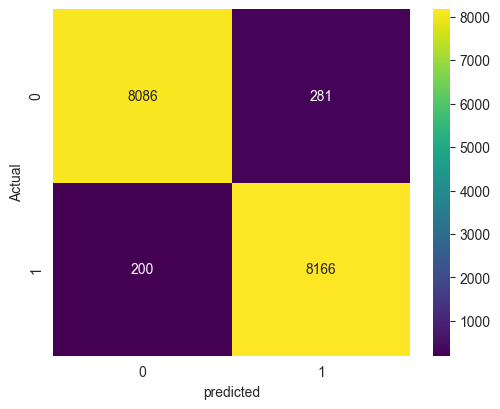

In [37]:
# Applying Logistic Regression

lg_model = LogisticRegression()
lg_model.fit(x_scale_train, y_train)
y_pred = lg_model.predict(x_scale_test)
results_logis_reg = modelEvaluation(y_pred, y_test, 'Logistic Regression')

AUC Score: 0.9967


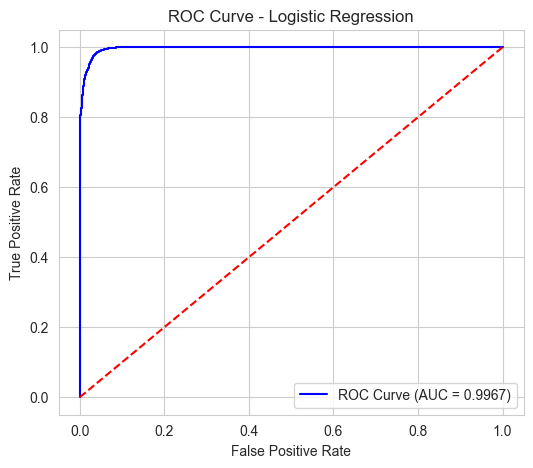

In [38]:
# Calculating predicted probabilities for the positive class
y_pred_proba = lg_model.predict_proba(x_scale_test)[:, 1]  

# Computing ROC curve and AUC score
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Printing AUC score
print(f"AUC Score: {roc_auc:.4f}")

# Plotting ROC Curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.show()

### Decision Tree

========== Decision Tree ==========

Accuracy on validation set: 0.9828

Classification report : 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      8367
           1       0.98      0.98      0.98      8366

    accuracy                           0.98     16733
   macro avg       0.98      0.98      0.98     16733
weighted avg       0.98      0.98      0.98     16733


Confusion Matrix : 



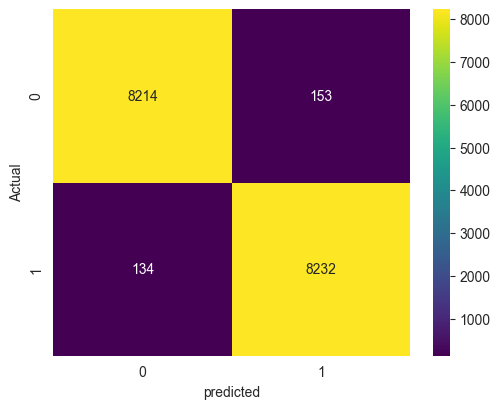

In [40]:
# Applying Decision Tree Classifier

dt_model = DecisionTreeClassifier()
dt_model.fit(x_scale_train, y_train)
y_pred = dt_model.predict(x_scale_test)
results_logis_reg = modelEvaluation(y_pred, y_test, 'Decision Tree')

AUC Score: 0.9828


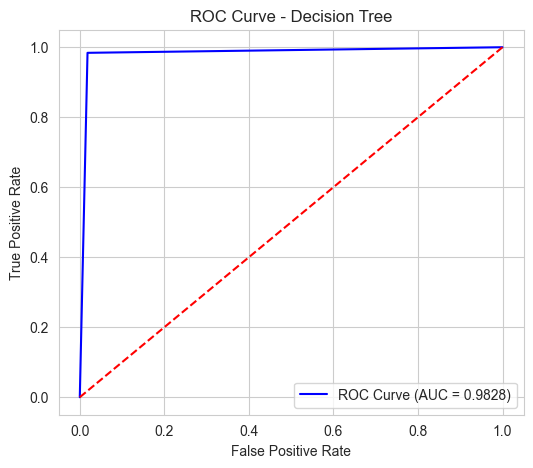

In [45]:
# Calculating predicted probabilities for the positive class
y_pred_proba = dt_model.predict_proba(x_scale_test)[:, 1]  

# Computing ROC curve and AUC score
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Printing AUC score
print(f"AUC Score: {roc_auc:.4f}")

# Plotting ROC Curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend(loc="lower right")
plt.show()

### Niave Bayes

========== Naive Bayes ==========

Accuracy on validation set: 0.7681

Classification report : 
               precision    recall  f1-score   support

           0       0.68      1.00      0.81      8367
           1       1.00      0.54      0.70      8366

    accuracy                           0.77     16733
   macro avg       0.84      0.77      0.75     16733
weighted avg       0.84      0.77      0.75     16733


Confusion Matrix : 



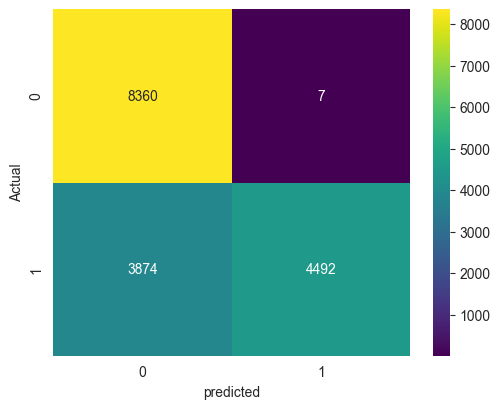

In [42]:
# Applying Naive Bayes Model

nb_model = GaussianNB()
nb_model.fit(x_scale_train, y_train)
y_pred = nb_model.predict(x_scale_test)
results_logis_reg = modelEvaluation(y_pred, y_test, 'Naive Bayes')

AUC Score: 0.9942


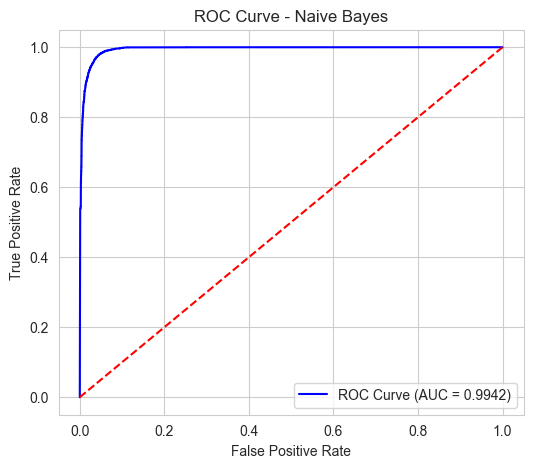

In [44]:
# Calculating predicted probabilities for the positive class
y_pred_proba = nb_model.predict_proba(x_scale_test)[:, 1]  

# Computing ROC curve and AUC score
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Printing AUC score
print(f"AUC Score: {roc_auc:.4f}")

# Plotting ROC Curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Naive Bayes')
plt.legend(loc="lower right")
plt.show()

### Random Forest

In [27]:
# Applying Random Forest

rf_model = RandomForestClassifier()
rf_model.fit(x_scale_train, y_train)
y_pred = rf_model.predict(x_scale_test)
results_logis_reg = modelEvaluation(y_pred, y_test, 'Random Forest')

========== Random Forest ==========

Accuracy on validation set: 0.9866

Classification report : 
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      8367
           1       0.98      0.99      0.99      8366

    accuracy                           0.99     16733
   macro avg       0.99      0.99      0.99     16733
weighted avg       0.99      0.99      0.99     16733


Confusion Matrix : 



NameError: name 'plt' is not defined

In [28]:
with open("random_forest_model.pkl", "wb") as file:
    pickle.dump(rf_model, file)


AUC Score: 0.9996


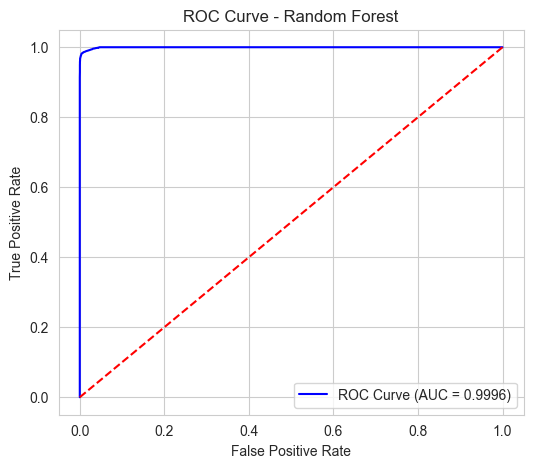

In [47]:
# Calculating predicted probabilities for the positive class
y_pred_proba = rf_model.predict_proba(x_scale_test)[:, 1]  

# Computing ROC curve and AUC score
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Printing AUC score
print(f"AUC Score: {roc_auc:.4f}")

# Plotting ROC Curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc="lower right")
plt.show()

# Applying Artificial Neural Network

In [18]:
model = Sequential()

In [19]:
model.add(Dense(units=64, activation='relu', input_dim = 16))
# Additional hidden layers based on best hyperparameters
model.add(Dense(units=128, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(units=256, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(units=512, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(units=256, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(units=128, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(units=64, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(units=32, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(units=16, activation='relu'))
model.add(BatchNormalization())
    # Output layer
model.add(Dense(units=1, activation='sigmoid'))

In [20]:
print(f"shapeof x_scale_train is {x_scale_train.shape}")

shapeof x_scale_train is (66929, 16)


In [21]:
optimizer_adam = Adam(learning_rate = 0.0001)

model.compile(optimizer = optimizer_adam, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [23]:
early_stopping = EarlyStopping( patience=20, restore_best_weights=True)

history = model.fit(x_scale_train, y_train, epochs = 200, validation_data=(x_scale_test, y_test), callbacks = [early_stopping])

Epoch 1/200
2092/2092 [==============================] - 17s 8ms/step - loss: 0.0699 - accuracy: 0.9731 - val_loss: 0.0628 - val_accuracy: 0.9753
Epoch 2/200
2092/2092 [==============================] - 17s 8ms/step - loss: 0.0640 - accuracy: 0.9753 - val_loss: 0.0671 - val_accuracy: 0.9739
Epoch 3/200
2092/2092 [==============================] - 18s 9ms/step - loss: 0.0626 - accuracy: 0.9755 - val_loss: 0.0588 - val_accuracy: 0.9772
Epoch 4/200
2092/2092 [==============================] - 18s 9ms/step - loss: 0.0590 - accuracy: 0.9771 - val_loss: 0.0595 - val_accuracy: 0.9767
Epoch 5/200
2092/2092 [==============================] - 17s 8ms/step - loss: 0.0557 - accuracy: 0.9781 - val_loss: 0.0566 - val_accuracy: 0.9768
Epoch 6/200
2092/2092 [==============================] - 17s 8ms/step - loss: 0.0541 - accuracy: 0.9784 - val_loss: 0.0572 - val_accuracy: 0.9769
Epoch 7/200
2092/2092 [==============================] - 17s 8ms/step - loss: 0.0519 - accuracy: 0.9795 - val_loss: 0.0776 -

### Training and Validation Accuracy

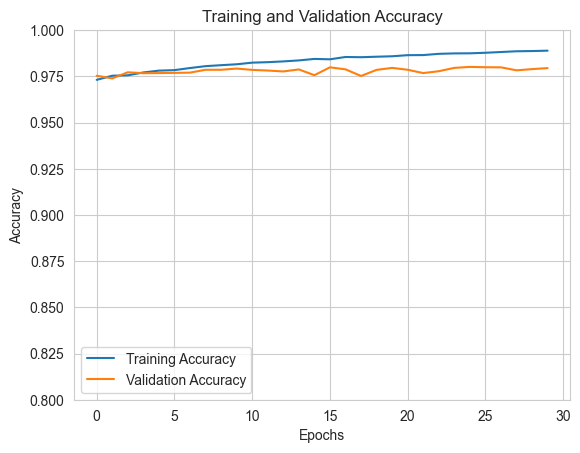

In [28]:
# Plot training accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
# Plot validation accuracy
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

# Add labels and title
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylim(0.8, 1.00)
# Add legend to the plot
plt.legend()
# Show the plot
plt.show()

### Training and Validation Loss

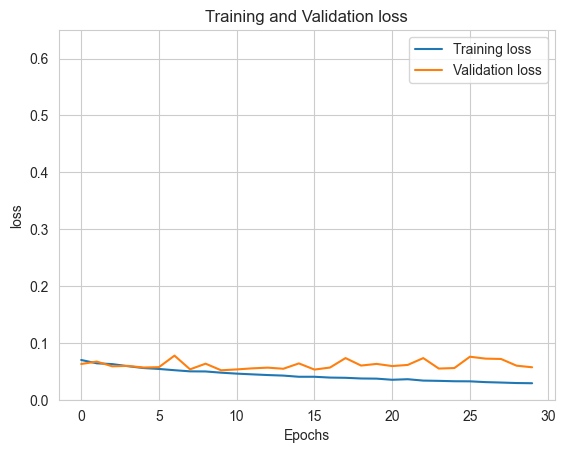

In [33]:
# Plot training accuracy
plt.plot(history.history['loss'], label='Training loss')
# Plot validation accuracy
plt.plot(history.history['val_loss'], label='Validation loss')

# Add labels and title
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.title('Training and Validation loss')
plt.ylim(0, 0.65)
# Add legend to the plot
plt.legend()
# Show the plot
plt.show()

### Confusion Matrix and Classification report

523/523 [==============================] - 2s 2ms/step
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      8367
           1       0.97      0.99      0.98      8366

    accuracy                           0.98     16733
   macro avg       0.98      0.98      0.98     16733
weighted avg       0.98      0.98      0.98     16733



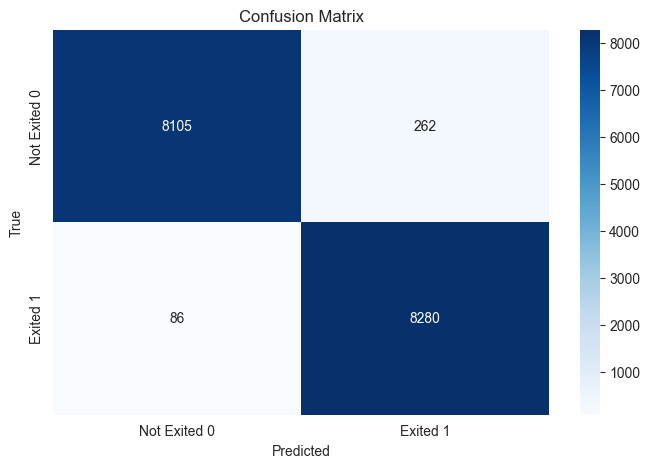

In [34]:
# Predict on test data
y_pred = model.predict(x_scale_test)
y_pred = (y_pred > 0.5)  # Convert probabilities to binary class labels

# Print classification report
print(classification_report(y_test, y_pred))

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Exited 0', 'Exited 1'], yticklabels=['Not Exited 0', 'Exited 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [49]:
# Saving our Trained Artificial Neural Network and It also has outperformed among all other model

model.save('ann_model.h5')
print("ANN model saved successfully as 'ann_model.h5'")

ANN model saved successfully as 'ann_model.h5'


C:\Users\NEC\anaconda3\envs\sales_report-env\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
